In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model

# * Sequential 형식으로 하나하나씩 만들기

In [ ]:
# model = tf.keras.models.Sequential([
    
#     tf.keras.layers.Conv2D(~~~),
#     tf.keras.layers.Conv2D(~~~),
    
    
# ]) # add와 같은형태!! 

In [3]:
model = Sequential()
# 반드시 입력 단부터 출력단으로 내려가면서 추가- ---> add 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [4]:
import pydot
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

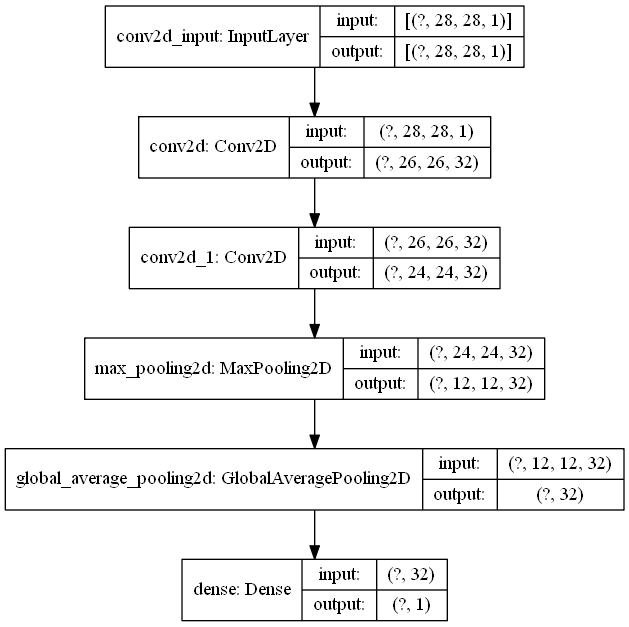

In [5]:
plot_model(model, show_shapes=True)

# * 함수형 : 입력/출력 -->입력/출력으로 무엇을 할지에 대한 기술,,,

In [ ]:
t=f(X)
conv -> conv -> maxpool -> averpool -> danse1

In [71]:
# 함수형 모델을 만들기 위한 Model 메소드 불러오기... 
from tensorflow.keras.models import Model

# 각기 층들에 필요한 레이어 종류들... 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.layers import Concatenate

# 설계도를 이쁘게 그리려고 시각화..
from tensorflow.keras.utils import plot_model

In [13]:
# 입력레이어 설계...
inputs_layer = Input(shape=(32,32,3))
# 이제 히든레이어 설계...
# [기능][입력]
x = Conv2D(32, (3,3), activation='relu')(inputs_layer)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs = inputs_layer, outputs = x )

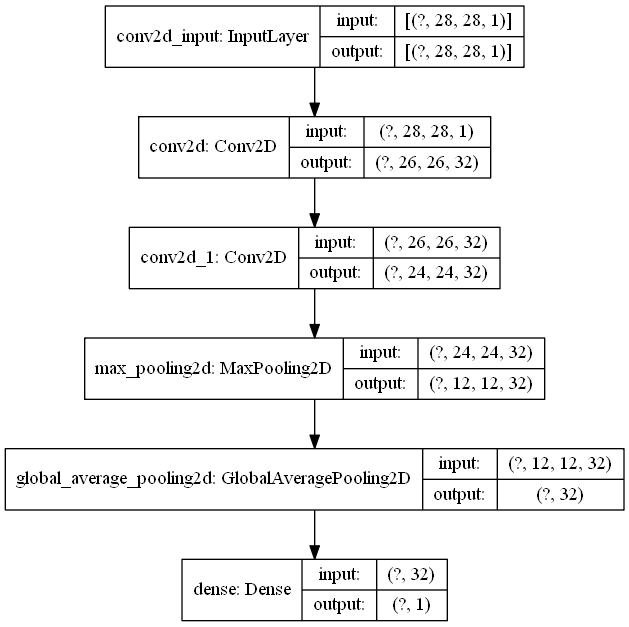

In [14]:
plot_model(model, show_shapes=True)

In [30]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1234)

# (42000, 28,28)---> (42000,28,28,1)

In [32]:
x_train = x_train.reshape(-1, 28, 28, 1)/255
x_val = x_val.reshape(-1, 28, 28, 1)/255
x_test = x_test.reshape(-1, 28, 28, 1)/255

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)


(42000, 28, 28, 1)
(18000, 28, 28, 1)
(10000, 28, 28, 1)


In [34]:
inputs_layer = Input(shape=(28,28,1))
x = Conv2D(32,(3,3),activation='relu')(inputs_layer)
x = Conv2D(32,(3,3),activation='relu')(x)
x = MaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation='softmax')(x)

model=Model(inputs=inputs_layer, outputs=x)

In [36]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [61]:
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
         epochs=10)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [46]:
input_layer = Input(shape=(32,32,3))
def inception_made(x) :
    x_1 = Conv2D(32, (1,1), activation='relu')(x)
    
    x_2 = Conv2D(48, (1,1), activation='relu')(x)
    x_2 = Conv2D(64, (1,1), activation='relu', padding='same')(x_2)
    
    x_3 = Conv2D(32, (1,1), activation='relu')(x)
    x_3 = Conv2D(32, (1,1), activation='relu', padding='same')(x_3)
    
    x_4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    x_4 = Conv2D(32, (1,1), activation='relu')(x_4)
    
    output = Concatenate()([x_1, x_2, x_3, x_4])
    output = Dense(10, activation='softmax')(output)
    
    return output

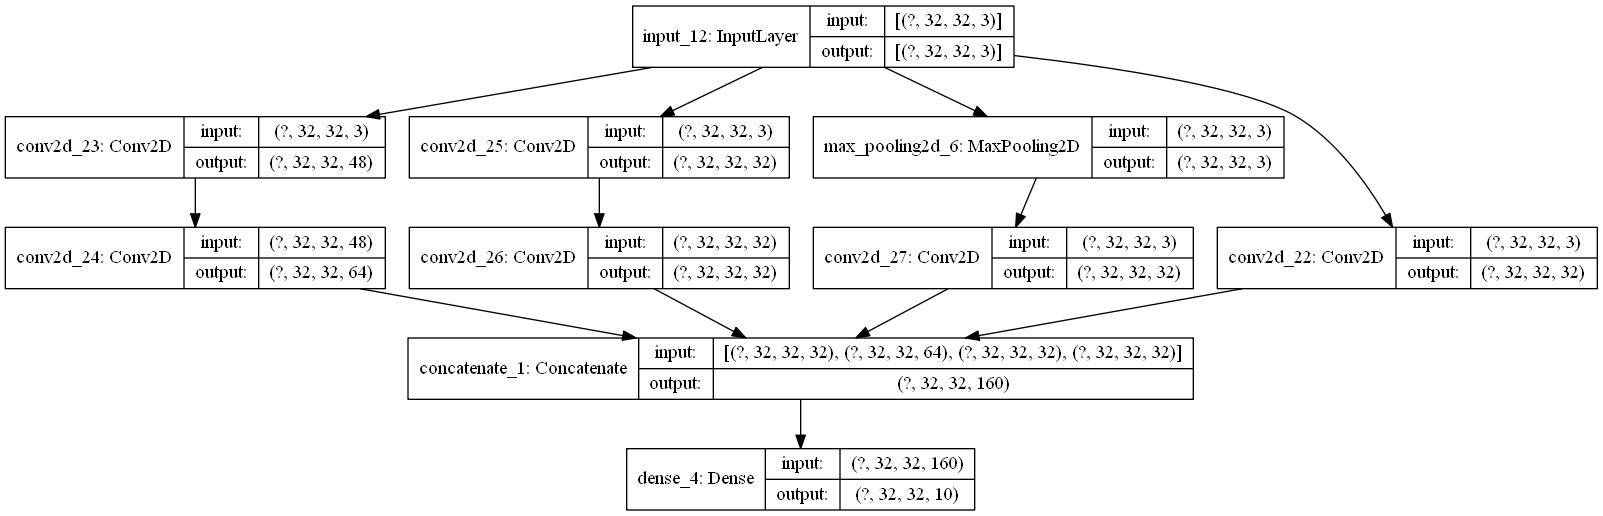

In [48]:
x = inception_made(input_layer)
model = Model(inputs = input_layer, outputs = x)
plot_model(model, show_shapes=True)

In [49]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 32, 32, 48)   192         input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 32, 32, 32)   128         input_12[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 32, 32, 3)    0           input_12[0][0]                   
_______________________________________________________________________________________

# cifar-10 데이터에 inception 일부 모델만 가지고 설계해보기

In [50]:
from tensorflow.keras.datasets import cifar10

In [51]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 48s 0us/step


In [52]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [55]:
import numpy as np
x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [57]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1234)

In [60]:
print(x_train.shape)
print(x_val.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)


In [72]:
input_layer = Input(shape=(32,32,3))
def inception_made(x) :
    x_1 = Conv2D(32, (1,1), activation='relu')(x)
    
    x_2 = Conv2D(48, (1,1), activation='relu')(x)
    x_2 = Conv2D(64, (1,1), activation='relu', padding='same')(x_2)
    
    x_3 = Conv2D(32, (1,1), activation='relu')(x)
    x_3 = Conv2D(32, (1,1), activation='relu', padding='same')(x_3)
    
    x_4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    x_4 = Conv2D(32, (1,1), activation='relu')(x_4)
    
    output = Concatenate()([x_1, x_2, x_3, x_4])
    # 플래튼 레이어!!! 항상 모양맞추기위해!!
    output=Flatten()(output)
    output = Dense(10, activation='softmax')(output)
    
    
    
    return output

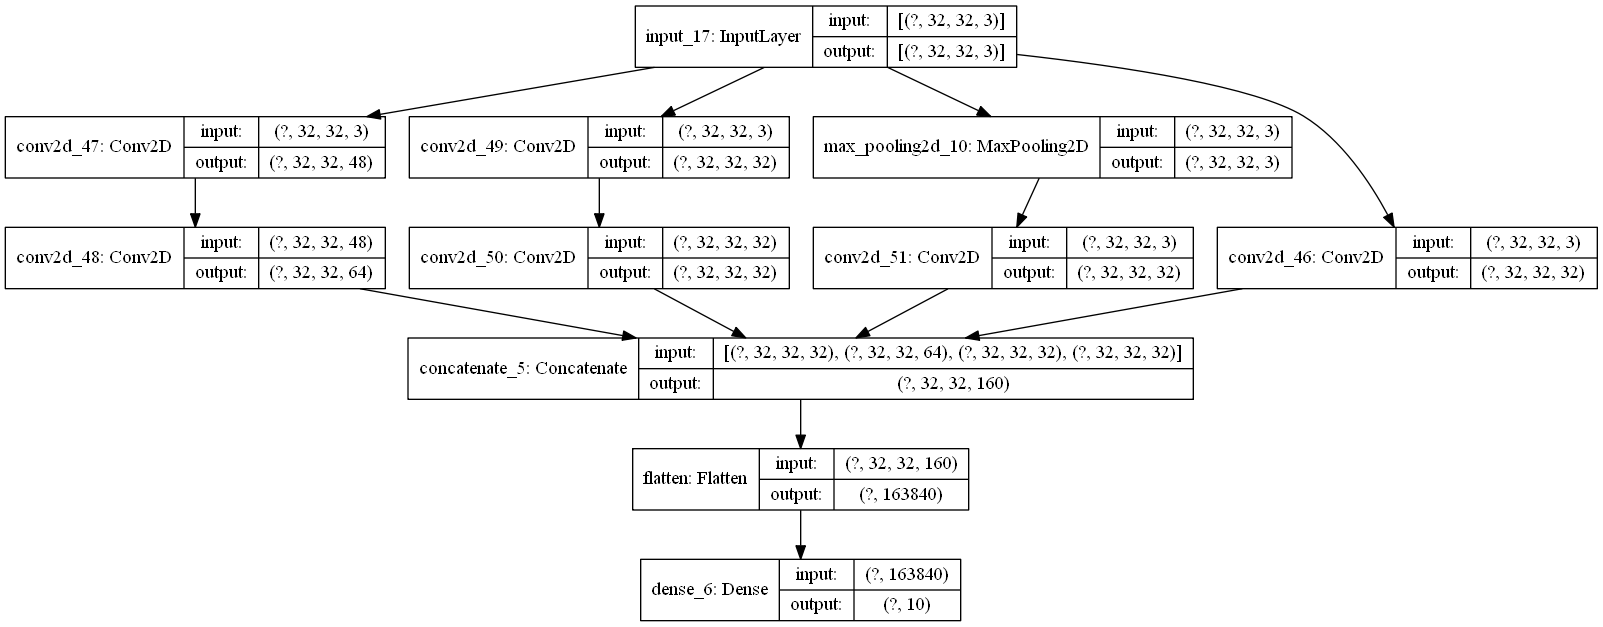

In [73]:
x = inception_made(input_layer)
model = Model(inputs = input_layer, outputs = x)
plot_model(model, show_shapes=True)

In [74]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)

In [75]:
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
         epochs=10)

Epoch 1/10
1094/1094 [==============================] - 47s 43ms/step - loss: 1.9068 - accuracy: 0.4323 - val_loss: 1.5219 - val_accuracy: 0.4795
Epoch 2/10
1094/1094 [==============================] - 46s 42ms/step - loss: 1.3847 - accuracy: 0.5231 - val_loss: 1.5106 - val_accuracy: 0.4840
Epoch 3/10
1094/1094 [==============================] - 45s 41ms/step - loss: 1.2580 - accuracy: 0.5678 - val_loss: 1.4928 - val_accuracy: 0.4943
Epoch 4/10
1094/1094 [==============================] - 45s 41ms/step - loss: 1.1334 - accuracy: 0.6131 - val_loss: 1.5219 - val_accuracy: 0.4905
Epoch 5/10
1094/1094 [==============================] - 44s 41ms/step - loss: 0.9922 - accuracy: 0.6647 - val_loss: 1.5910 - val_accuracy: 0.4901
Epoch 6/10
1094/1094 [==============================] - 45s 41ms/step - loss: 0.8424 - accuracy: 0.7167 - val_loss: 1.7608 - val_accuracy: 0.4580
Epoch 7/10
1094/1094 [==============================] - 45s 41ms/step - loss: 0.6853 - accuracy: 0.7741 - val_loss: 1.9067 -